In [4]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\hp\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
  dataset = randn(25)

(0, 1)

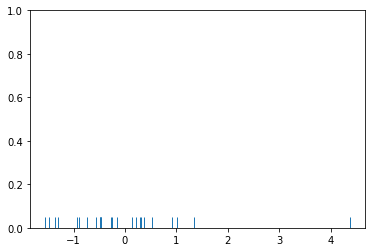

In [9]:
sns.rugplot(dataset)
plt.ylim(0,1)

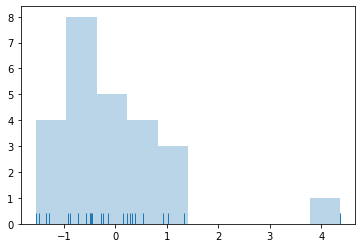

In [10]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

sns.rugplot(dataset)
x_min =dataset.min() - 2
x_max = dataset.max()+ 2
x_axis = np.linspace(x_min,x_max,100)

bandwidth = ( (4*dataset.std()**5)/(3*len(dataset)))** 0.2

kernel_list = []

for data_points in dataset:
    
    #Create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_points,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel/ kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel,color='grey', alpha=0.5)
    
plt.ylim(0,1)

(0, 1)

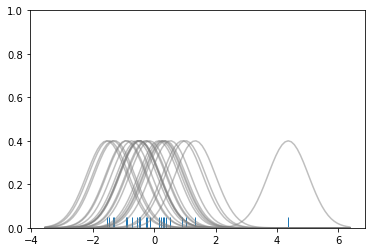

In [19]:
sns.rugplot(dataset) 
x_min =dataset.min() - 2 
x_max = dataset.max()+ 2 
x_axis = np.linspace(x_min,x_max,100)

bandwidth = ( (4 *dataset.std()**5)/(3*len(dataset)))** 0.2

kernel_list = []

for data_points in dataset:

    #Create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_points,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)

    #Scale for plotting
    kernel = kernel/ kernel.max()
    kernel = kernel * 0.4

    plt.plot(x_axis,kernel,color='grey', alpha=0.5)
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the basic functions')

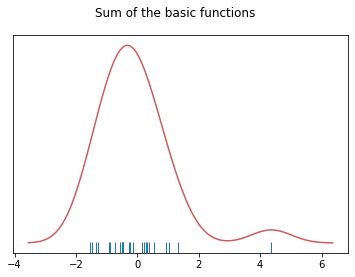

In [20]:
sum_of_kde = np.sum(kernel_list, axis=0)
fig= plt.plot(x_axis,sum_of_kde, color= 'indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle("Sum of the basic functions")


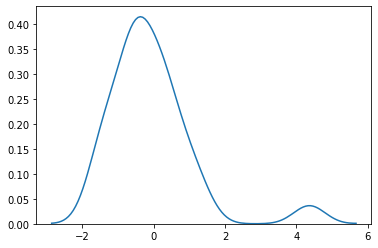

In [21]:
sns.kdeplot(dataset)

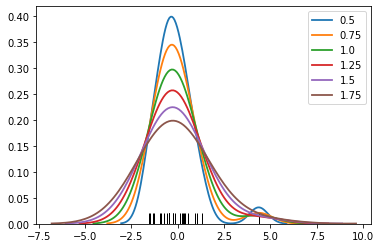

In [22]:
sns.rugplot(dataset, color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

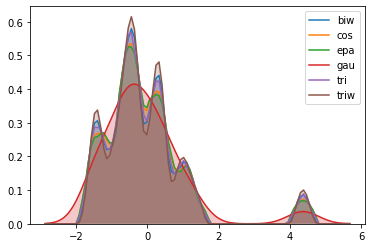

In [25]:
kernel_option =['biw','cos','epa','gau','tri','triw']
    
for kern in kernel_option:
    sns.kdeplot(dataset,kernel=kern, label=kern, shade=True)

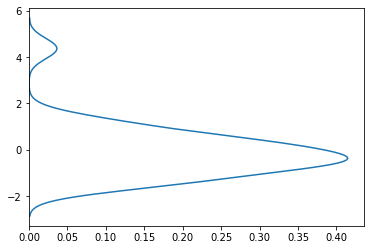

In [26]:
sns.kdeplot(dataset,vertical=  True)

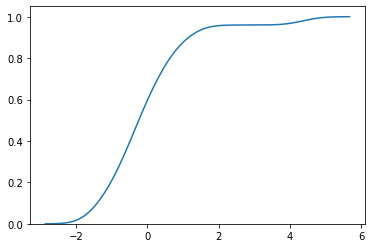

In [27]:
sns.kdeplot(dataset,cumulative = True)

In [28]:
mean = [0,0]
cov=[[1,2],[0,100]]

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  """Entry point for launching an IPython kernel.
C:\Users\hp\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


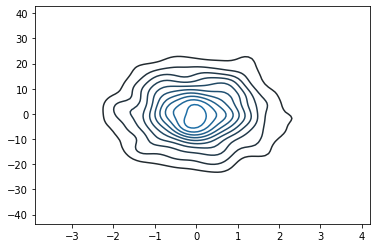

In [29]:
dataset2= np.random.multivariate_normal(mean,cov,1000)
dframe = pd.DataFrame(dataset2,columns=['X','Y'])
sns.kdeplot(dframe)

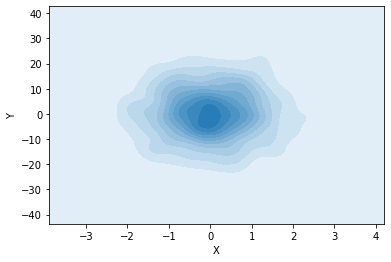

In [31]:
sns.kdeplot(dframe.X, dframe.Y,shade=True)

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


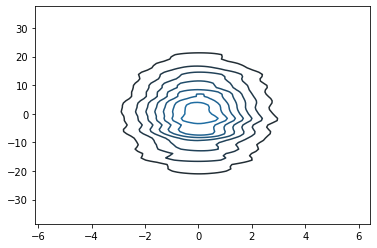

In [32]:
sns.kdeplot(dframe,bw=1)

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


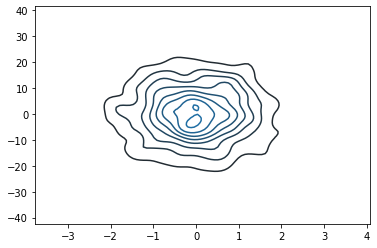

In [33]:
sns.kdeplot(dframe,bw='silverman')

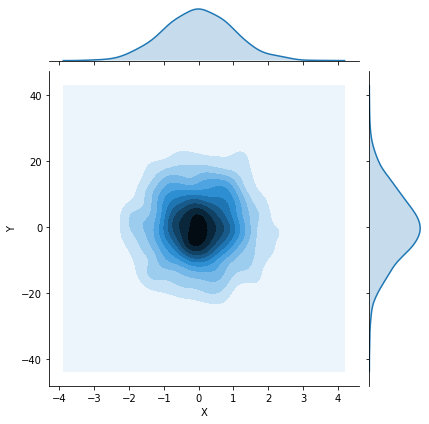

In [34]:
sns.jointplot('X','Y',dframe,kind='kde')